
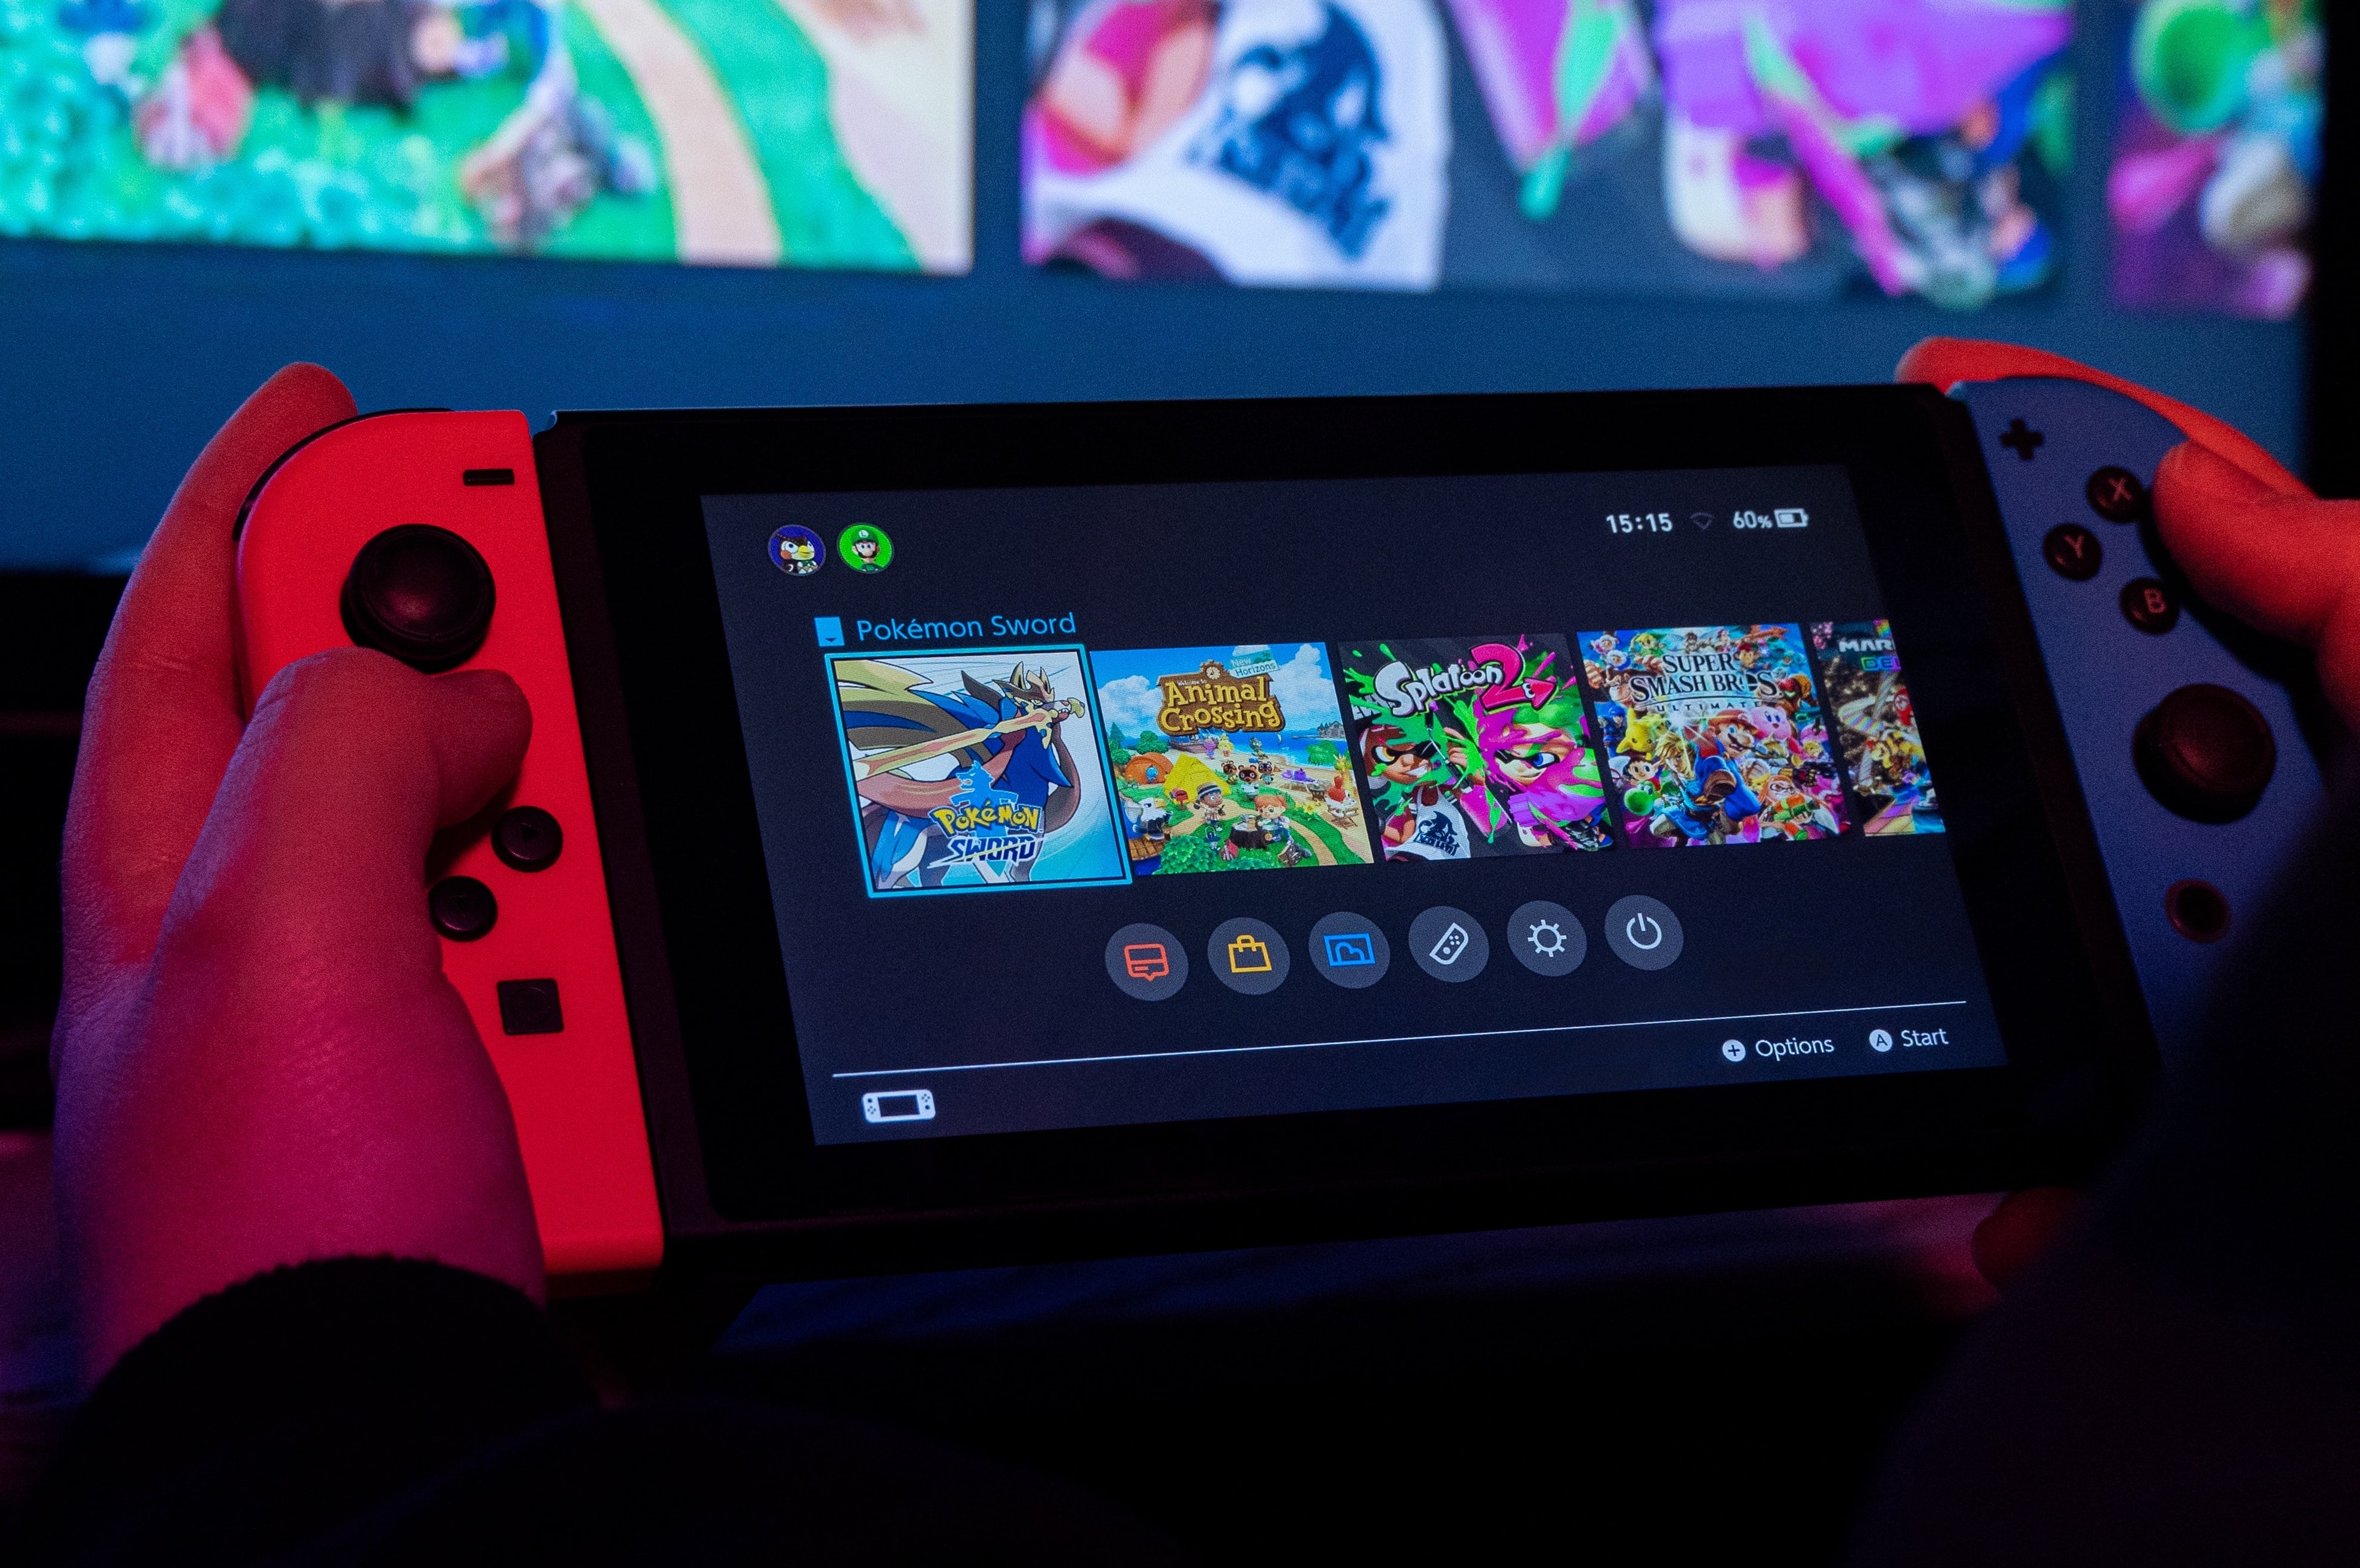![video_game](video_game.jpg)


Video games are big business: the global gaming market is projected to be worth more than $300 billion by 2027 according to Mordor Intelligence. With so much money at stake, the major game publishers are hugely incentivized to create the next big hit. But are games getting better, or has the golden age of video games already passed?

In this project, you'll analyze video game critic and user scores as well as sales data for the top 400 video games released since 1977. You'll search for a golden age of video games by identifying release years that users and critics liked best, and you'll explore the business side of gaming by looking at game sales data.

Your search will involve joining datasets and comparing results with set theory. You'll also filter, group, and order data. Make sure you brush up on these skills before trying this project! The database contains two tables. Each table has been limited to 400 rows for this project, but you can find the complete dataset with over 13,000 games on Kaggle.

### `game_sales` table

| Column | Definition | Data Type |
|-|-|-|  
|name|Name of the video game|`varchar`|
|platform|Gaming platform|`varchar`|
|publisher|Game publisher|`varchar`|
|developer|Game developer|`varchar`|
|games_sold|Number of copies sold (millions)|`float`|
|year|Release year|`int`|

### `reviews` table

| Column | Definition | Data Type |
|-|-|-|
|name|Name of the video game|`varchar`|  
|critic_score|Critic score according to Metacritic|`float`|
|user_score|User score according to Metacritic|`float`|


### `users_avg_year_rating` table

| Column | Definition | Data Type |
|-|-|-|
|year| Release year of the games reviewed |`int`|  
|num_games| Number of games released that year |`int`|
|avg_user_score| Average score of all the games ratings for the year |`float`|

### `critics_avg_year_rating` table

| Column | Definition | Data Type |
|-|-|-|
|year| Release year of the games reviewed |`int`|  
|num_games| Number of games released that year |`int`|
|avg_critic_score| Average score of all the games ratings for the year |`float`|



Find the ten best-selling games. The output should contain all the columns in the game_sales table and be sorted by the games_sold column in descending order. Save the output as *best_selling_games*.

- Find the ten years with the highest average critic score, where at least four games were released (to ensure a good sample size). Return an output with the columns year, num_games released, and avg_critic_score. The avg_critic_score should be rounded to 2 decimal places. The table should be ordered by avg_critic_score in descending order. Save the output as *critics_top_ten_years*.

- Find the years where critics and users broadly agreed that games released were highly rated. Specifically, return the years where the average critic score was over 9 OR the average user score was over 9. The query should return the following columns: year, num_games, avg_critic_score, avg_user_score, and diff. The diff column should be the difference between the avg_critic_score and avg_user_score, it should be a positive float. The table should be ordered by the diff column in ascending order, save this as a dataframe named *golden_years*.


In [ ]:
# Preparing enviroment:

from sqlalchemy import create_engine, text
import pandas as pd

reviews = pd.read_csv("/content/game_reviews.csv")
game_sales = pd.read_csv("/content/game_sales.csv")
#top_critic_scores = pd.read_csv('/content/top_critic_scores.csv')
#top_critic_scores_more_than_four_games = pd.read_csv('/content/top_critic_scores_more_than_four_games.csv')
#top_scores_more_than_four_games = pd.read_csv('/content/top_user_scores_more_than_four_games.csv')

# Create a SQLite database engine
engine = create_engine('sqlite:///reviews.sqlite')

# Write the data from DataFrame to a SQLite database table
reviews.to_sql('reviews', engine, index=False, if_exists='replace')
game_sales.to_sql('game_sales', engine, index=False, if_exists='replace')
#top_critic_scores.to_sql('top_critic_scores', engine, index=False, if_exists='replace')
#top_critic_scores_more_than_four_games.to_sql('top_critic_scores_4', engine, index=False, if_exists='replace')
#top_scores_more_than_four_games.to_sql('top_scores_4', engine, index=False, if_exists='replace')


# Create a connection to the SQLite database
connection = engine.connect()

# TASK 1
#-- best_selling_games
best_selling_games = pd.read_sql_query(text(
    """ SELECT *
        FROM game_sales
        ORDER BY Total_Shipped DESC
        LIMIT 10
    """
    ), connection)

# TASK 2
#-- critics_top_ten_years

critics_top_ten_years = pd.read_sql_query(text(
    """SELECT
        g.year,
        COUNT(g.name) AS num_games_released,
        ROUND(AVG(r.critic_score), 2) AS avg_critic_score
    FROM game_sales as g
    INNER JOIN reviews AS r USING(name)
    GROUP BY year
    HAVING COUNT(g.name)>10
    ORDER BY avg_critic_score DESC
    LIMIT 10"""
    ), connection)

# TASK 3
#-- golden_years

golden_years = pd.read_sql_query(text(
    """SELECT
        g.year,
        COUNT(g.name) AS num_games,
        ROUND(AVG(r.critic_score), 2) AS avg_critic_score,
        ROUND(AVG(r.user_score), 2) AS avg_user_score,
        ABS(ROUND((AVG(r.critic_score)-AVG(r.user_score)), 2)) AS diff
    FROM game_sales as g
    INNER JOIN reviews AS r USING(name)
    GROUP BY year
    HAVING AVG(r.critic_score)>=9 OR AVG(r.user_score)>=9
    ORDER BY diff
    """
    ), connection)


# Close the connection
connection.close()


best_selling_games

,Name,Platform,Publisher,Developer,Total_Shipped,Year
0,Wii Sports for Wii,Wii,Nintendo,Nintendo EAD,82.90,2006
1,Super Mario Bros. for NES,NES,Nintendo,Nintendo EAD,40.24,1985
2,Counter-Strike: Global Offensive for PC,PC,Valve,Valve Corporation,40.00,2012
3,Mario Kart Wii for Wii,Wii,Nintendo,Nintendo EAD,37.32,2008
4,PLAYERUNKNOWN'S BATTLEGROUNDS for PC,PC,PUBG Corporation,PUBG Corporation,36.60,2017
5,Minecraft for PC,PC,Mojang,Mojang AB,33.15,2010
6,Wii Sports Resort for Wii,Wii,Nintendo,Nintendo EAD,33.13,2009
7,Pokemon Red / Green / Blue Version for GB,GB,Nintendo,Game Freak,31.38,1998
8,New Super Mario Bros. for DS,DS,Nintendo,Nintendo EAD,30.80,2006
9,New Super Mario Bros. Wii for Wii,Wii,Nintendo,Nintendo EAD,30.30,2009


In [ ]:
game_sales

,Rank,Name,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Year
0,1,Wii Sports,Wii,Nintendo,Nintendo EAD,7.7,8.0,82.90,2006
1,2,Super Mario Bros.,NES,Nintendo,Nintendo EAD,10.0,8.2,40.24,1985
2,3,Counter-Strike: Global Offensive,PC,Valve,Valve Corporation,8.0,7.5,40.00,2012
3,4,Mario Kart Wii,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.32,2008
4,5,PLAYERUNKNOWN'S BATTLEGROUNDS,PC,PUBG Corporation,PUBG Corporation,8.6,4.7,36.60,2017
...,...,...,...,...,...,...,...,...,...
19595,19594,FirePower for Microsoft Combat Flight Simulator 3,PC,GMX Media,Shockwave Productions,NaN,NaN,0.01,2004
19596,19595,Tom Clancy's Splinter Cell,PC,Ubisoft,Ubisoft,9.4,NaN,0.01,2003
19597,19596,Ashita no Joe 2: The Anime Super Remix,PS2,Capcom,Capcom,NaN,NaN,0.01,2002
19598,19597,Tokyo Yamanote Boys for V: Main Disc,PSV,Rejet,Rejet,NaN,NaN,0.01,2017
